In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
A = 'Quality_data.csv'

quality_data = pd.read_csv(A)
quality_data

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0
2,72.0,1,A,407,608,210,117,s,a,APU3b,4,O,a,b,0.0,1,01.10.18 15:39:57,01.10.18 16:50:40,0
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18908,NaN,1,A,407,628,210,122,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:15:06,31.01.19 22:15:06,0
18909,NaN,1,A,407,655,229,172,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:16:17,31.01.19 22:22:51,0
18910,NaN,2,A,407,657,266,122,s,b,APU3b,1,I,a,b,0.0,1,31.01.19 22:27:37,31.01.19 22:36:22,0
18911,NaN,1,A,407,655,229,172,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:43:50,31.01.19 22:50:55,0


In [3]:
new_quality = quality_data

for i in range(len(quality_data)-1, -1 , -1):
    if np.array(quality_data.iloc[i, 14:15]) == 'b' or (np.array(quality_data.iloc[i, 0:1])[0] > 0) == False:
        new_quality = new_quality.drop(new_quality.index[i])

In [6]:
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0
2,72.0,1,A,407,608,210,117,s,a,APU3b,4,O,a,b,0.0,1,01.10.18 15:39:57,01.10.18 16:50:40,0
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29,0
18879,76606.0,2,A,406,509,216,103,s,a,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00,0
18880,76611.0,2,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26,0
18881,76612.0,2,A,407,655,229,172,s,b,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07,0


In [ ]:
plt.plot(np.array(new_quality.iloc[:, 17]), np.array(new_quality.iloc[:, 16]), 'o')

In [5]:
Y = np.matrix(new_quality.iloc[:, 15])

X = np.matrix(new_quality.iloc[:, 16])

k = len(X)

if np.shape(X)[0] == 1:
    X = np.transpose(X)

X_mod = np.c_[np.ones(k), X]

#if np.shape(Y)[0] == 1:
 #   Y_mod = np.transpose(Y)
    
Y_mod = Y
    
def least_squares_variables():
    A = []
    j = 0
    A_whole = np.linalg.inv(np.transpose(X_mod) * X_mod) * np.transpose(X_mod) * Y_mod
    A.append(A_whole)
    return A
A = least_squares_variables()

# Once the linear coefficents have been calculated, the predicted y-cooridnates can be easily calculated
# as follows.

"Initial line(s) of best fit"

Y_linear = np.zeros(np.shape(X))
j = 0
i = 0
for i in range(k):
    Y_linear[i] =  np.float(A[j][0]) + np.float(A[j][1]) * X[i]
    
    
# Line of best fit for the rework minutes (y-axis) against the quality rating (x-axis). As you can see, a correlation test will
# not work beacuse the data is heavily skewed and there are too few values for quality rating. 


plt.plot(X[:],Y_linear[:])
plt.plot(X[:], Y_mod[:], 'o')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 18883

In [6]:
# Measurement of skeweness for the data.

print(new_quality.skew())

Product ID                   0.116218
Product characteristic 1     0.206467
Quality Characteristic 1     2.209937
Quality Characteristic 2     0.130696
Quality Characteristic 3     0.797399
Quality Characteristic 4     0.119422
Process Characteristic 2     0.062137
Rework Minutes               9.101162
Quality rating               1.719758
Quality Characteristic 7     4.297156
dtype: float64


Text(0.5, 1.0, 'Violin plot of Rework Minutes')

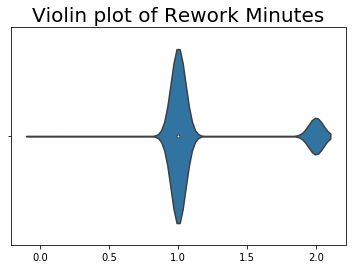

In [7]:
sns.violinplot(Y).set_title("Violin plot of Rework Minutes", size = 20)

In [8]:
sns.violinplot(X).set_title("Violin plot of quality rating", size = 20)

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [9]:
nozero_quality = new_quality

for i in range(len(new_quality)-1, -1 , -1):
    if np.array(new_quality.iloc[i, 15:16]) == 0:
        nozero_quality = nozero_quality.drop(nozero_quality.index[i])

In [10]:
Y = np.matrix(nozero_quality.iloc[:, 15:16])

X = np.matrix(nozero_quality.iloc[:, 16:17])

k = len(X)

if np.shape(X)[0] == 1:
    X = np.transpose(X)

X_mod = np.c_[np.ones(k), X]

#if np.shape(Y)[0] == 1:
 #   Y_mod = np.transpose(Y)
    
Y_mod = Y
    
def least_squares_variables():
    A = []
    j = 0
    A_whole = np.linalg.inv(np.transpose(X_mod) * X_mod) * np.transpose(X_mod) * Y_mod
    A.append(A_whole)
    return A
A = least_squares_variables()

# Once the linear coefficents have been calculated, the predicted y-cooridnates can be easily calculated
# as follows.

"Initial line(s) of best fit"

Y_linear = np.zeros(np.shape(X))
j = 0
i = 0
for i in range(k):
    Y_linear[i] =  np.float(A[j][0]) + np.float(A[j][1]) * X[i]
    
# There is slight improvement when the data containg `rework minutes' = 0 but not much.    

plt.plot(X[:],Y_linear[:])
plt.plot(X[:], Y_mod[:], 'o')

TypeError: can't multiply sequence by non-int of type 'str'

In [11]:
quality_data.skew()

Product ID                   0.116218
Product characteristic 1     0.207190
Quality Characteristic 1     2.211331
Quality Characteristic 2     0.129689
Quality Characteristic 3     0.797046
Quality Characteristic 4     0.118523
Process Characteristic 2     0.062819
Rework Minutes               9.107313
Quality rating               1.719865
Quality Characteristic 7     4.287207
dtype: float64

In [12]:
quality_data.iloc[:,1:2]

,Product characteristic 1
0,1
1,2
2,1
3,1
4,2
...,...
18908,1
18909,1
18910,2
18911,1


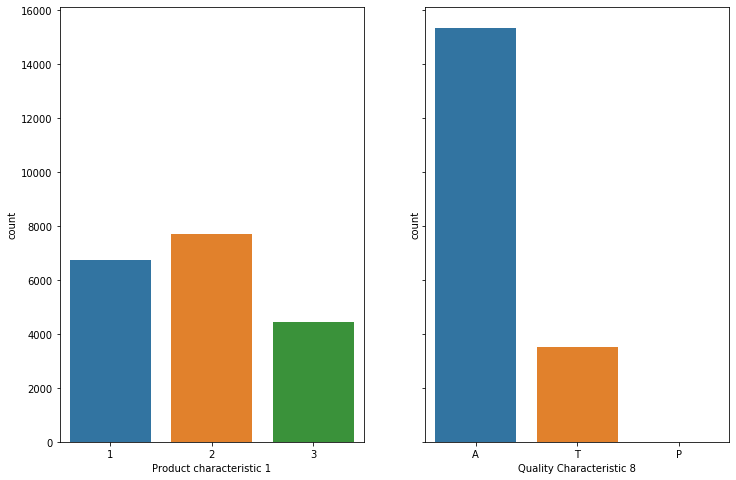

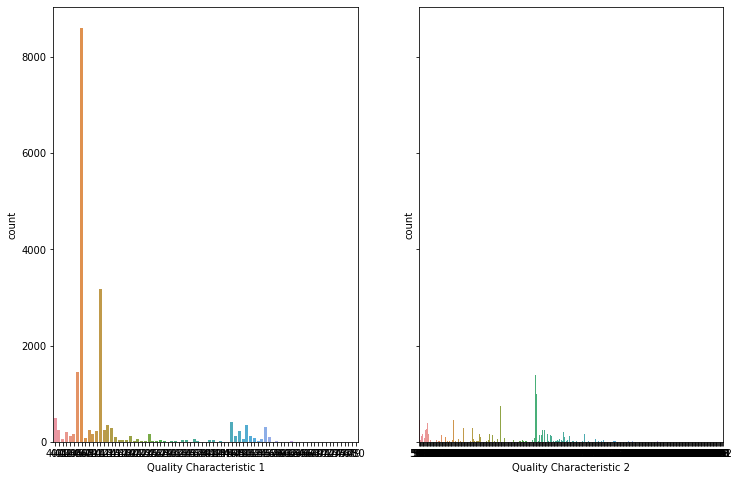

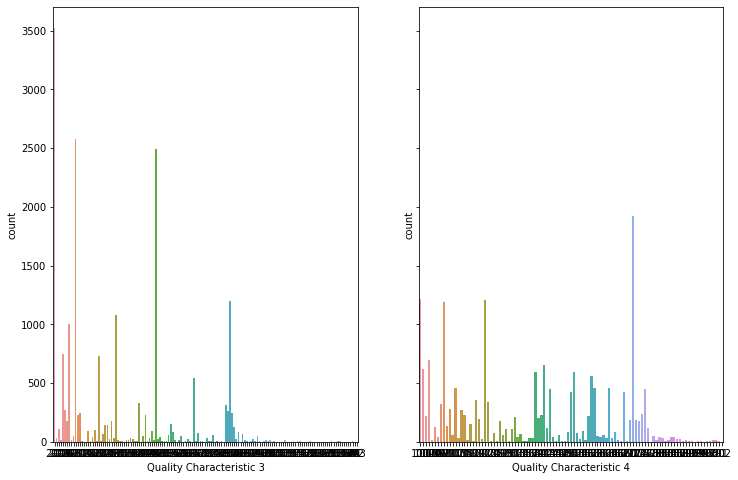

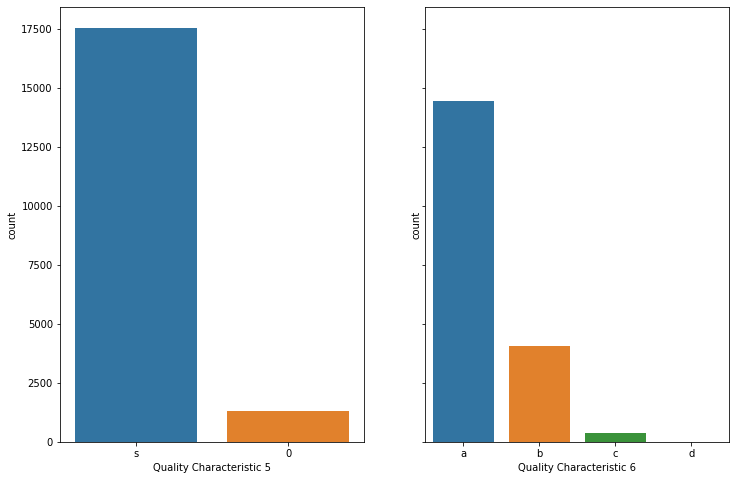

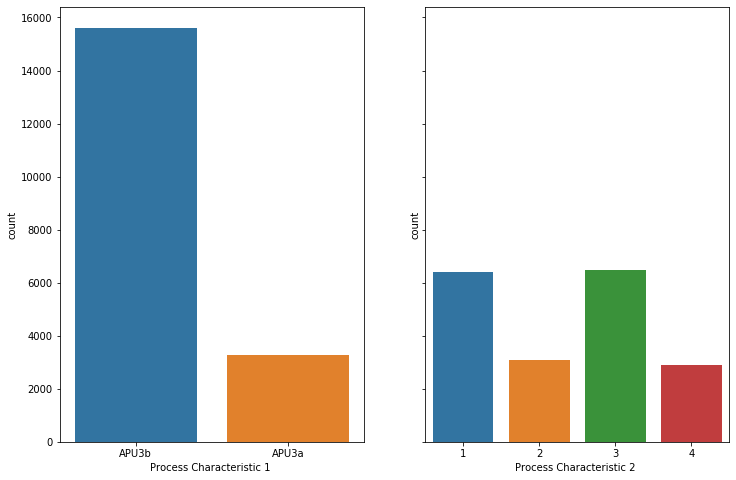

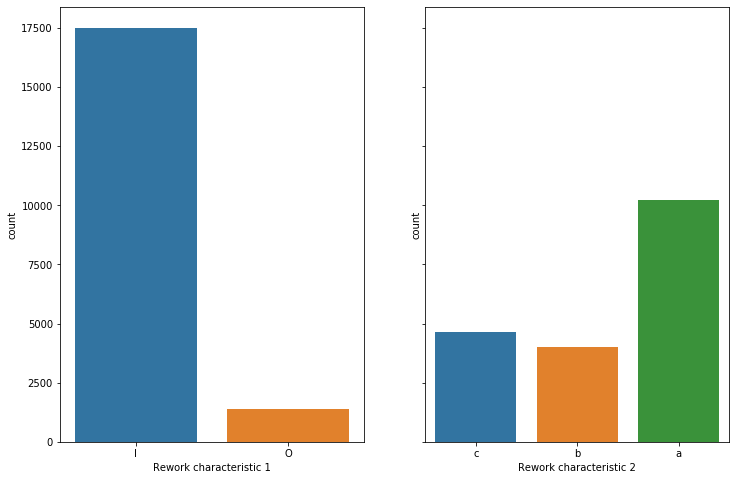

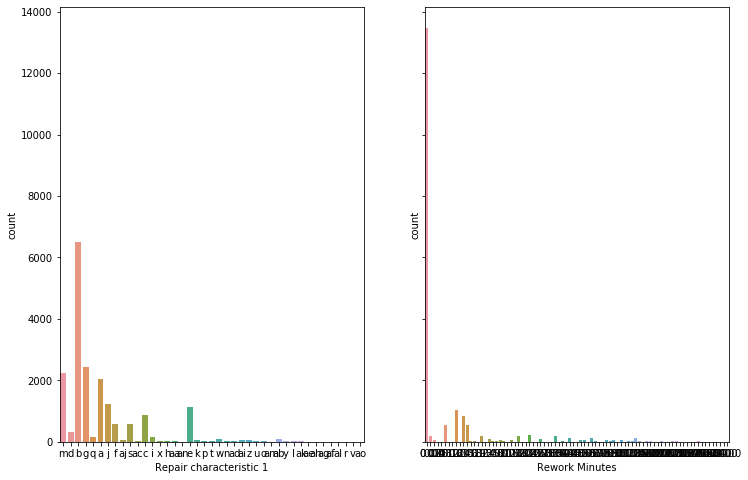

In [13]:
# Count of each label in each category
data = new_quality.iloc[:, 1:15]

#names of all the columns
cols = data.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 2
n_rows = 7
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=data, ax=ax[j])

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
cont_quality = new_quality.iloc[:, 1:16]

In [23]:
cont_quality['Quality Characteristic 5'] = le.fit_transform(np.array(cont_quality.iloc[:,5]))
cont_quality['Quality Characteristic 6'] = le.fit_transform(np.array(cont_quality.iloc[:,6]))
cont_quality['Quality Characteristic 7'] = le.fit_transform(np.array(cont_quality.iloc[:,7]))
cont_quality['Quality Characteristic 8'] = le.fit_transform(np.array(new_quality.iloc[:,8]))
cont_quality.iloc[:, 9:10] = le.fit_transform(np.array(new_quality.iloc[:,9]))
cont_quality['Rework characteristic 1'] = le.fit_transform(np.array(new_quality.iloc[:,11]))
cont_quality['Rework characteristic 2'] = le.fit_transform(np.array(new_quality.iloc[:,12]))
cont_quality['Repair characteristic 1'] = le.fit_transform(np.array(new_quality.iloc[:,13]))

In [24]:
cont_quality

,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Quality Characteristic 7
0,1,0,412,653,248,172,72,72,APU3b,1,0,2,27,0.0,1,72
1,2,1,408,793,221,147,47,47,APU3b,1,0,1,18,285.0,1,47
2,1,0,407,608,210,117,17,17,APU3b,1,1,0,16,0.0,1,17
3,1,0,407,608,248,142,42,42,APU3b,1,0,2,21,0.5,1,42
4,2,1,408,508,205,176,76,76,APU3b,1,0,1,18,25.0,1,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,1,1,407,655,282,172,72,72,APU3b,1,0,0,21,0.0,1,72
18879,2,0,406,509,216,103,3,3,APU3a,0,1,2,4,60.0,2,3
18880,2,1,407,655,282,172,72,72,APU3b,1,0,0,21,0.0,1,72
18881,2,1,407,655,229,172,72,72,APU3b,1,0,2,27,0.4,1,72


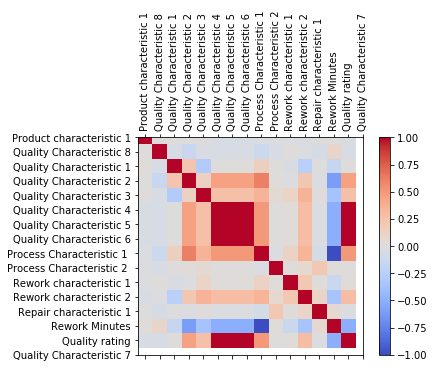

In [25]:
corr = cont_quality.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cont_quality.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cont_quality.columns)
ax.set_yticklabels(cont_quality.columns)
plt.show()

In [26]:
size = len(np.array(cont_quality)[0]) 
cols = cont_quality.columns


# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = cont_quality.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.2

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))


#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

IndexError: single positional indexer is out-of-bounds

In [35]:
B = 'Process_disturbances.csv'

process_disturbances = pd.read_csv(B)
process_disturbances

,Start,End,Total duration,Alarm text,Alarm class
0,01/10/2018 01:35,01/10/2018 06:00,15897,a,S
1,01/10/2018 03:04,01/10/2018 06:00,10538,b,E
2,01/10/2018 06:00,01/10/2018 06:00,14,a,S
3,01/10/2018 06:15,01/10/2018 06:16,71,a,S
4,01/10/2018 06:15,01/10/2018 06:16,66,c,O
...,...,...,...,...,...
15631,31/01/2019 11:30,31/01/2019 11:45,906,c,O
15632,31/01/2019 11:52,31/01/2019 11:53,28,a,S
15633,31/01/2019 11:52,31/01/2019 11:53,23,c,O
15634,31/01/2019 11:57,31/01/2019 11:58,33,a,S


In [36]:
process_disturbances['Total duration'].max()

1067529

In [48]:
ordered_time = process_disturbances.sort_values('Total duration', ascending=False)
ordered_time = ordered_time.iloc[:,2:5]
ordered_time

,Total duration,Alarm text,Alarm class
10756,1067529,b,E
10757,1059961,a,S
10712,224904,a,S
10715,204243,b,E
6713,173593,a,S
...,...,...,...
11452,1,a,S
8631,1,a,S
8630,1,a,S
11454,1,a,S


In [49]:
ordered_time['Alarm text'] = le.fit_transform(np.array(ordered_time.iloc[:,1]))
ordered_time['Alarm class'] = le.fit_transform(np.array(ordered_time.iloc[:,2]))

In [53]:
ort=ordered_time.head(1000)

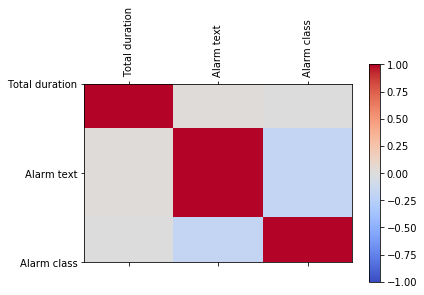

In [67]:
corr = ort.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(ort.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(ort.columns)
ax.set_yticklabels(ort.columns)
plt.show()

In [22]:
C = 'Product_tracking_information.csv'

#tracking points
#Z3200 - entry into process
#Z3299 - exit out of process

track_info = pd.read_csv(C)
track_info

,ZPKT,Format Date,Product ID
0,Z3200,01/10/2018 01:34,147
1,Z3200,01/10/2018 06:00,149
2,Z3299,01/10/2018 06:00,114
3,Z3200,01/10/2018 06:01,156
4,Z3299,01/10/2018 06:01,160
...,...,...,...
142280,Z3299,24/01/2019 20:21,71481
142281,Z3299,24/01/2019 20:28,71492
142282,Z3299,24/01/2019 20:30,71486
142283,Z3299,24/01/2019 20:31,71490


In [72]:
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0
2,72.0,1,A,407,608,210,117,s,a,APU3b,4,O,a,b,0.0,1,01.10.18 15:39:57,01.10.18 16:50:40,0
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29,0
18879,76606.0,2,A,406,509,216,103,s,a,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00,0
18880,76611.0,2,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26,0
18881,76612.0,2,A,407,655,229,172,s,b,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07,0


In [88]:
new_quality['Quality rating'].value_counts()

1    15633
2     3241
0        9
Name: Quality rating, dtype: int64

In [95]:
new_quality['No.'] = np.arange(len(new_quality))
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7,No.
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0,1
2,72.0,1,A,407,608,210,117,s,a,APU3b,4,O,a,b,0.0,1,01.10.18 15:39:57,01.10.18 16:50:40,0,2
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0,3
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29,0,18878
18879,76606.0,2,A,406,509,216,103,s,a,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00,0,18879
18880,76611.0,2,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26,0,18880
18881,76612.0,2,A,407,655,229,172,s,b,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07,0,18881


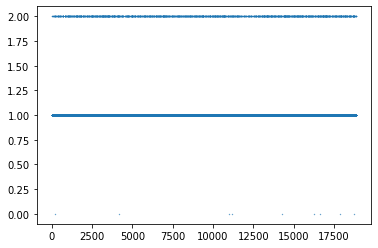

In [99]:
plt.scatter(new_quality.iloc[:,19],new_quality.iloc[:,15], s=0.1)

In [153]:
numero_list = []
numero = 0
for i in range(23):
    numero = new_quality.head(i*821)
    prob = numero['Quality rating'].value_counts('1')
    numero_list.append(prob)

In [154]:
numero_list

[Series([], Name: Quality rating, dtype: float64), 1    0.889160
 2    0.109622
 0    0.001218
 Name: Quality rating, dtype: float64, 1    0.860536
 2    0.138855
 0    0.000609
 Name: Quality rating, dtype: float64, 1    0.855055
 2    0.144539
 0    0.000406
 Name: Quality rating, dtype: float64, 1    0.840134
 2    0.159562
 0    0.000305
 Name: Quality rating, dtype: float64, 1    0.832400
 2    0.167357
 0    0.000244
 Name: Quality rating, dtype: float64, 1    0.835972
 2    0.163622
 0    0.000406
 Name: Quality rating, dtype: float64, 1    0.835566
 2    0.164086
 0    0.000348
 Name: Quality rating, dtype: float64, 1    0.834348
 2    0.165347
 0    0.000305
 Name: Quality rating, dtype: float64, 1    0.832318
 2    0.167411
 0    0.000271
 Name: Quality rating, dtype: float64, 1    0.833618
 2    0.166139
 0    0.000244
 Name: Quality rating, dtype: float64, 1    0.833463
 2    0.166316
 0    0.000221
 Name: Quality rating, dtype: float64, 1    0.832724
 2    0.167073
 0    0

In [155]:
numero_list_1 = []
numero_list_2 = []
numero_list_0 = []
for i in range(1,23,1):
    unos = numero_list[i][1]
    numero_list_1.append(unos)
    dos = numero_list[i][2]
    numero_list_2.append(dos)
    zeros = numero_list[i][0]
    numero_list_0.append(zeros)

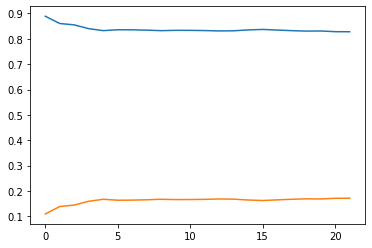

In [156]:
QR1=plt.plot(numero_list_1, label="QR1")
QR2=plt.plot(numero_list_2, label="QR2")
#QR0=plt.plot(numero_list_0, label="QR0")

In [157]:
numero_list1 = []
numero1 = 0
for i in range(23):
    numero1 = new_quality[(i-1)*821:i*821]
    prob = numero1['Quality rating'].value_counts('1')
    numero_list1.append(prob)
numero_list1

[Series([], Name: Quality rating, dtype: float64), 1    0.889160
 2    0.109622
 0    0.001218
 Name: Quality rating, dtype: float64, 1    0.831912
 2    0.168088
 Name: Quality rating, dtype: float64, 1    0.844093
 2    0.155907
 Name: Quality rating, dtype: float64, 1    0.795371
 2    0.204629
 Name: Quality rating, dtype: float64, 1    0.801462
 2    0.198538
 Name: Quality rating, dtype: float64, 1    0.853837
 2    0.144945
 0    0.001218
 Name: Quality rating, dtype: float64, 1    0.83313
 2    0.16687
 Name: Quality rating, dtype: float64, 1    0.825822
 2    0.174178
 Name: Quality rating, dtype: float64, 1    0.816078
 2    0.183922
 Name: Quality rating, dtype: float64, 1    0.845311
 2    0.154689
 Name: Quality rating, dtype: float64, 1    0.831912
 2    0.168088
 Name: Quality rating, dtype: float64, 1    0.824604
 2    0.175396
 Name: Quality rating, dtype: float64, 1    0.813642
 2    0.186358
 Name: Quality rating, dtype: float64, 1    0.839220
 2    0.158343
 0    0.

In [158]:
numero_list_1_1 = []
numero_list_2_1 = []
numero_list_0_1 = []
for i in range(1,23,1):
    unos1 = numero_list1[i][1]
    numero_list_1_1.append(unos1)
    dos1 = numero_list1[i][2]
    numero_list_2_1.append(dos1)
    #zeros1 = numero_list1[i][0]
    #numero_list_0_1.append(zeros1)

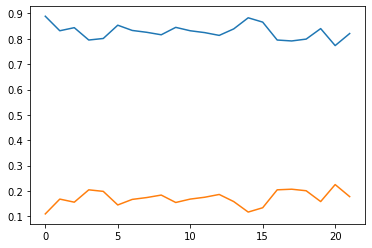

In [159]:
QR1_1=plt.plot(numero_list_1_1, label="QR1")
QR2_1=plt.plot(numero_list_2_1, label="QR2")
#QR0_1=plt.plot(numero_list_0_1, label="QR0")